## Readability of Fisheries and Oceans Canada project descriptions

### Step 1: Prepare and clean project descriptions for analysis

Load libraries and dataset. 
Clean the project descriptions with Textatistic's tool punct_clean. The data has already been manually reviewed and updated to eliminate bullet points and non-sentence ending full stops.

In [1]:
import pandas as pd

#readability library
import textatistic
from textatistic import Textatistic

#graph libraries
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
DFO = pd.read_excel("data/processed/DFO_50select_clean.xlsx")
DFO.head(3)

,Unnamed: 0,project number,project_name_en,project_name_fr,RA_ID,description_en,description_fr,status_en,created_at,eaStartDate,responsible_authorities_en,responsible_authorities_fr,wordcount,descript_clean
0,447,80569,L'Orignal Marina - Floating Breakwater Replace...,Marina de L'Orignal - Remplacement du brise-la...,DFO,L&#39;Orignal Marina is located on the south s...,La Marina L&#39;Orignal est situ&eacute;e sur ...,Completed,2020-03-26 14:30:45.497,2021-03-01,Fisheries and Oceans Canada,Pêches et Océans Canada,147,L'Orignal Marina is located on the south shore...
1,60,81778,Howards Cove Wharf Upgrades,Améliorations du quai de Howards Cove,DFO,The marginal wharf #402 at Howards Cove Small ...,Le quai longitudinal 402 &agrave; le port pour...,Completed,2021-07-08 14:35:52.940,2021-07-08,Fisheries and Oceans Canada,Pêches et Océans Canada,223,The marginal wharf #402 at Howards Cove Small ...
2,71,81735,"Launch Ramp Reconstruction - Whitefish Point, ...",Reconstruction de rampe de mise à l'eau - Whi...,DFO,"Whitefish Point Harbour, Manitoba is located i...","Le port de Whitefish Point, au Manitoba, est s...",Completed,2021-06-29 09:23:00.337,2021-06-29,Fisheries and Oceans Canada,Pêches et Océans Canada,122,"Whitefish Point Harbour, Manitoba is located i..."


In [3]:
# reduce the table

DFO_data = DFO[["project number", "descript_clean"]].copy()

In [4]:
#clean the project description text and create a new column with the ready-to-analyse text
DFO_data["descr_ready"] = DFO_data["descript_clean"].apply(textatistic.punct_clean)

### Step 2: Readability scores

Calculate the scores and send to new columns.

In [5]:
DFO_data["flesch_re"] = DFO_data["descr_ready"].apply(textatistic.flesch_score)
DFO_data["flesch_kin"] = DFO_data["descr_ready"].apply(textatistic.fleschkincaid_score)
DFO_data["dalechall"] = DFO_data["descr_ready"].apply(textatistic.dalechall_score)
DFO_data["fog"] = DFO_data["descr_ready"].apply(textatistic.gunningfog_score)
DFO_data.head()

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
0,80569,L'Orignal Marina is located on the south shore...,L'Orignal Marina is located on the south shore...,53.183468,11.969189,10.727872,15.272072
1,81778,The marginal wharf #402 at Howards Cove Small ...,The marginal wharf #402 at Howards Cove Small ...,68.544187,8.848022,10.135669,11.097927
2,81735,"Whitefish Point Harbour, Manitoba is located i...","Whitefish Point Harbour, Manitoba is located i...",63.188367,9.621400,12.122713,12.173333
3,81727,"Gull Harbour, Manitoba is located on Hecla Isl...","Gull Harbour, Manitoba is located on Hecla Isl...",63.231667,8.911481,11.547078,11.644444
4,80539,The Department of Fisheries and Oceans Canada ...,The Department of Fisheries and Oceans Canada ...,55.551040,12.156519,11.456384,14.438318


### Step 3: Analyse the results

Start with basic descriptive statistics.

### Flesch reading ease

In Flesch reading ease, a score between 60 and 70 is considered "plain English," according to R. Flesch.

In [6]:
DFO_data["flesch_re"].describe()

count    47.000000
mean     56.179123
std       9.863078
min      29.471422
25%      48.099923
50%      56.681479
75%      63.519167
max      73.891951
Name: flesch_re, dtype: float64

What is the text with the minimum (worst) Flesch reading ease score?

In [7]:
DFO_data[DFO_data.flesch_re == DFO_data.flesch_re.min()]

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
22,81254,"The Real Property, Safety and Security Branch ...","The Real Property, Safety and Security Branch ...",29.471422,17.251226,11.696841,20.687663


In [8]:
print(DFO_data.iloc[22, 2])

The Real Property, Safety and Security Branch of Fisheries and Oceans Canada (DFO-RPSS) plan to repurpose an existing building at the Bedford Institute of Oceanography (BIO) in Dartmouth, Halifax Regional Municipality to provide more efficient use and newly renovated space to accommodate the Facility for Intelligent Marine Systems (FIMS) and Fish Lab Renovation (FLR).  Conceptual design includes wet laboratory space, shared large field prep areas, and Workplace 2+0 office accommodations.  The building will benefit from an improved building envelope, sustainability features, and a better working environment for occupants.

 

The existing Fish Lab building is a 3,073 m2 two-story building that was originally constructed in 1965 with an addition completed in 1998. The building is deteriorating, and due to its age and nature of its renovations and additions over the years, the interior configuration is less than ideal.  Many of the building systems are also nearing the end of life and wil

What is the text with the highest (best) Flesch reading ease score?

In [9]:
DFO_data[DFO_data.flesch_re == DFO_data.flesch_re.max()]

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
23,80359,The Dalhousie Yacht Club located at 74 Lightho...,The Dalhousie Yacht Club located at 74 Lightho...,73.891951,9.014525,9.247232,11.727213


In [10]:
print(DFO_data.iloc[23, 2])

The Dalhousie Yacht Club located at 74 Lighthouse Rd, Saint Catharine's, ON on the Twelve Mile Creek, plans to install a travel lift dock. The project will take place on federal lands located in Port Dalhousie Small Craft Harbour, owned by Fisheries and Oceans Canada, Small Craft Harbours. The travel lift dock will be installed over an existing concrete boat ramp to facilitate boat launching. The project will consist of driving two rows of in water steel piles to support the travel lift's steel frame and wooden docks connecting to shore. Each row of piles will have 5 piles spaced approximately 12 feet apart, projecting approximately 50 feet from the waters' edge and will have a 20 foot width between dock frames.


### Flesch Kincaid grade level

In [11]:
DFO_data["flesch_kin"].describe()

count    47.000000
mean     11.625887
std       2.451914
min       7.987704
25%       9.713598
50%      11.351158
75%      13.286648
max      17.562500
Name: flesch_kin, dtype: float64

What is the text with the max (worst) FK grade level score?

In [12]:
DFO_data[DFO_data.flesch_kin == DFO_data.flesch_kin.max()]

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
36,81053,Small Craft Harbours (SCH) is undertaking main...,Small Craft Harbours (SCH) is undertaking main...,40.3925,17.5625,12.726,19.75


In [13]:
print(DFO_data.iloc[36, 2])

Small Craft Harbours (SCH) is undertaking maintenance dredging of the Port Simpson (Lax Kw'alaams) Small Craft Harbours site, located on the Tsmpsean Peninsula coast, approximately 35km north of Prince Rupert, British Columbia in the Skeena-Queen Charlotte Regional District.

The proposed project involves will require a dredge cut of up to -3+5m Chart Datum (CD), resulting in removal of up to 6,800 m3 of material, to return the elevation of the mudline within the harbour entrance channel to the original design grade for safe navigation of fishing vessels.  A barge mounted clamshell or excavator, with scow will be loaded with dredge material and towed offsite to a disposal at sea site where it will be offloaded under a disposal at sea (DAS) permit.

Environmental monitoring by a Qualified Environmental Professional (QEP) and a silt curtain will be employed during all in-water work which will occur during windows of least risk to fish as defined by Fisheries and Oceans Canada.


What is the text with the min (best) FK grade level score?

In [14]:
DFO_data[DFO_data.flesch_kin == DFO_data.flesch_kin.min()]

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
46,80323,Cormorant Lake Harbour is located on the East ...,Cormorant Lake Harbour is located on the East ...,71.858419,7.987704,9.229218,10.002941


In [15]:
print(DFO_data.iloc[46, 2])

Cormorant Lake Harbour is located on the East side of Cormorant Lake in Cormorant Manitoba. It is approximately 78km Northeast of The Pas, MB and is accessible via Provincial Road 287. The harbour is under the administration of Fisheries and Oceans Canada (DFO), Small Craft Harbours Branch (SCH).

Small Craft Harbours is proposing to cut exiting steel piles to the lake bottom. The scope of the project includes cutting of three existing steel piles that are currently submerged underwater and disposing of them off site. Small Craft Harbours requires that the piles are removed to allow for vessels to have safe access to the harbour. The proposed work will be done in winter of 2019/2020 from the ice. SCH is proposing for a team of underwater divers to cut the steel piles off at lake bottom, pull the excess of the steel piles from the water and have them disposed of off site.


Note that the Flesch RE and the Flesch Kincaid scores are not in agreement about the most and least readable texts.

### Dale-Chall scores

In [16]:
DFO_data["dalechall"].describe()

count    47.000000
mean     10.980001
std       1.021423
min       8.893699
25%      10.140271
50%      11.161244
75%      11.694977
max      12.726000
Name: dalechall, dtype: float64

In [17]:
DFO_data[DFO_data.dalechall == DFO_data.dalechall.min()]

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
38,81216,Fisheries and Oceans Canada owns and operates ...,Fisheries and Oceans Canada owns and operates ...,65.900793,9.685782,8.893699,12.039351


In [18]:
DFO_data[DFO_data.dalechall == DFO_data.dalechall.max()]

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
36,81053,Small Craft Harbours (SCH) is undertaking main...,Small Craft Harbours (SCH) is undertaking main...,40.3925,17.5625,12.726,19.75


The Dale-Chall and Flesch Kincaid agree that the least readable text is 81053 (Small Craft Harbours...)

The most readable is different from above.

In [19]:
print(DFO_data.iloc[38, 2]) #most readable according to Dale-Chall

Fisheries and Oceans Canada owns and operates a Canadian Coast Guard Search and Rescue Station on land known as the Port Dover Recreational Harbour in Port Dover, Ontario. This land is leased by Fisheries and Oceans Canada long-term from the Corporation of Norfolk County. Municipal address of the site is 55 Passmore Avenue, Port Dover, Ontario. Approximate GPS coordinates are 42°46'54+59" North, 80°11'41+17" West. A floating dock structure, measuring 13+69 metres in length with a width of 1+84 metres, is installed adjacent to the property into Lake Erie. This dock is used by the Canadian Coast Guard to provide a place to berth their rigid inflatable boat used in marine search and rescue operations. Constructed in two halves, the floating dock structure consists of wood deck planks fastened to galvanized steel support members supported by two floating galvanized pontoons. The floating dock is secured in the water by driven steel piles at the east and west ends of the floating dock.

The

### Fog scores

In [20]:
DFO_data["fog"].describe()

count    47.000000
mean     14.329367
std       2.650604
min      10.002941
25%      12.106342
50%      14.266667
75%      16.400000
max      20.687663
Name: fog, dtype: float64

In [21]:
DFO_data[DFO_data.fog == DFO_data.fog.min()] # most readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
46,80323,Cormorant Lake Harbour is located on the East ...,Cormorant Lake Harbour is located on the East ...,71.858419,7.987704,9.229218,10.002941


In [22]:
DFO_data[DFO_data.fog == DFO_data.fog.max()] # least readable

,project number,descript_clean,descr_ready,flesch_re,flesch_kin,dalechall,fog
22,81254,"The Real Property, Safety and Security Branch ...","The Real Property, Safety and Security Branch ...",29.471422,17.251226,11.696841,20.687663


The Fog index agrees with Flesch-Kincaid that 80323 (Cormorant Lake Harbour...) is most readable.  
The Fog index agrees with Flesch reading ease that 81254 (Real Property...) is least readable.


### Step 4: Graph the results

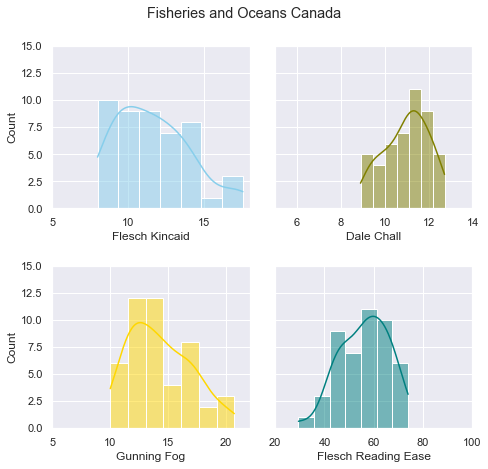

In [63]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharey=True)


sns.histplot(data=DFO_data, x="flesch_kin", kde=True, color="skyblue", 
             ax=axs[0, 0]).set(xlabel="Flesch Kincaid")
sns.histplot(data=DFO_data, x="dalechall", kde=True, color="olive", 
             ax=axs[0, 1]).set(xlabel = "Dale Chall")
sns.histplot(data=DFO_data, x="fog", kde=True, color="gold", 
             ax=axs[1, 0]).set(xlabel = "Gunning Fog")
sns.histplot(data=DFO_data, x="flesch_re", kde=True, color="teal", 
             ax=axs[1, 1]).set(xlabel = "Flesch Reading Ease")


fig.tight_layout(pad = 2, rect=[0, 0.03, 1, 0.95]) # add space between subplot rows and main title

for ax in axs: # make the y axis the same for all subplots
    plt.setp(ax, ylim=(0,15))

axs[0,0].set_xlim(5,18)  # flesch-kincaid x-axis
axs[1,0].set_xlim(5, 22) # gunning fog x-axis
axs[0,1].set_xlim(5, 14) # dale chall
axs[1,1].set_xlim(20, 100) # flesch reading ease
    
fig.suptitle("Fisheries and Oceans Canada")
plt.show()

### Step 5 : Save the results

In [64]:
#DFO_data.to_excel("data/processed/DFO_scores.xlsx", index = False)